<a href="https://colab.research.google.com/github/NoahHeerdink/E-News-Express/blob/main/Heerdink_ENews_Express.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

Problem Statement: The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objectives: The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/Great Learning/2.0 Business Statistics/Project 2: Business Statistics /abtest.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.shape

(100, 6)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
df.duplicated().sum()

0

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: title={'center': 'Countplot = Time Spent on the Landing Page'}, xlabel='group', ylabel='count'>

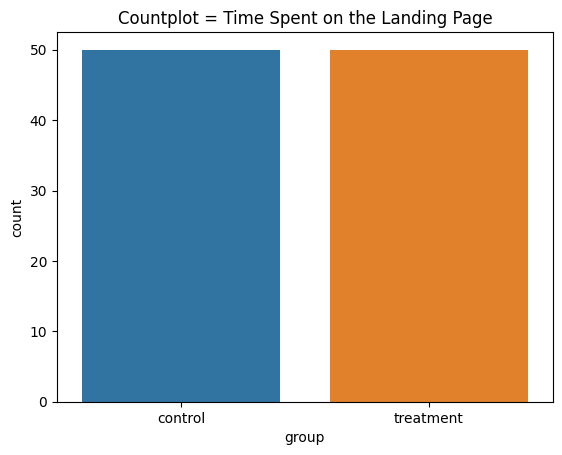

In [10]:
plt.title('Countplot = Time Spent on the Landing Page')
sns.countplot(data=df,x='group')

<Axes: title={'center': 'Histogram: Time Spent on the Landing Page'}, xlabel='time_spent_on_the_page', ylabel='Count'>

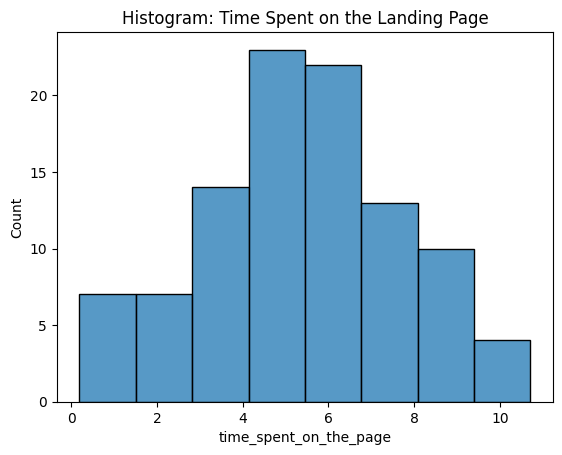

In [11]:
plt.title('Histogram: Time Spent on the Landing Page')
sns.histplot(data=df, x='time_spent_on_the_page')

<Axes: title={'center': 'Histogram: Time Spent on the Landing Page'}, xlabel='time_spent_on_the_page'>

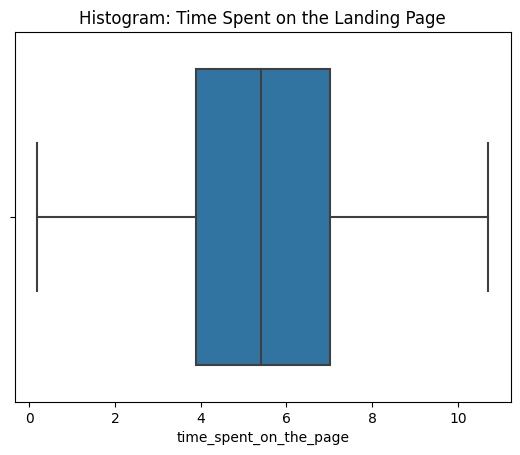

In [12]:
plt.title('Histogram: Time Spent on the Landing Page')
sns.boxplot(data=df,x='time_spent_on_the_page')

### Step 1: Define the null and alternate hypotheses

$H_0$: The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

$H_a$: The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### Step 2: Select Appropriate test

The appropriate test is a T-test.

### Step 3: Decide the significance level

Based on the problem, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [13]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == "old"]['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [14]:
from scipy.stats import ttest_ind
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [15]:
if p_value < 0.05:
    print('Since the p-value ' + str(p_value) + ' is less than alpha, we reject the null hypothesis.')
else:
    print('Since the p-value ' + str(p_value) + ' is greater than alpha, we fail to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is less than alpha, we reject the null hypothesis.


### Step 7:  Draw inference

Since we can reject the null hypothesis, we can say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

$H_0:$ The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is equal to the conversion rate for the old page.

$H_a$: The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

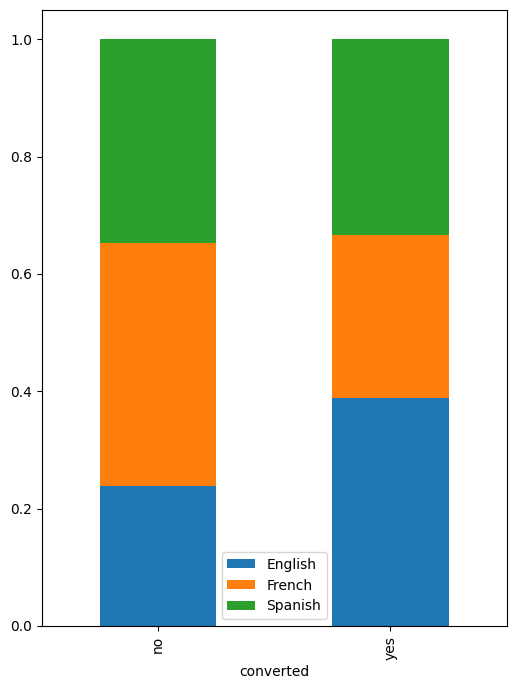

In [16]:
pd.crosstab(df["converted"],df["language_preferred"],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

The appropriate test is a Z-test.

Based on the problem, we select $\alpha = 0.05$.

In [17]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [18]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='two-sided')

print('The p-value is', p_value)

The p-value is 0.016052616408112556


In [19]:
if p_value < 0.05:
    print('Since the p-value ' + str(p_value) + ' is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value ' +str(p_value) + ' is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


Since we can reject the null hypothesis, we can say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.



## 3. Is the conversion and preferred language are independent or related?

$H_0:$ The converted status does not depend on the preferred language.

$H_a:$ The converted status does depend on the preferred language.

The appropriate test is a Chi-Squared Test.

Based on the problem, we select  α=0.05 .

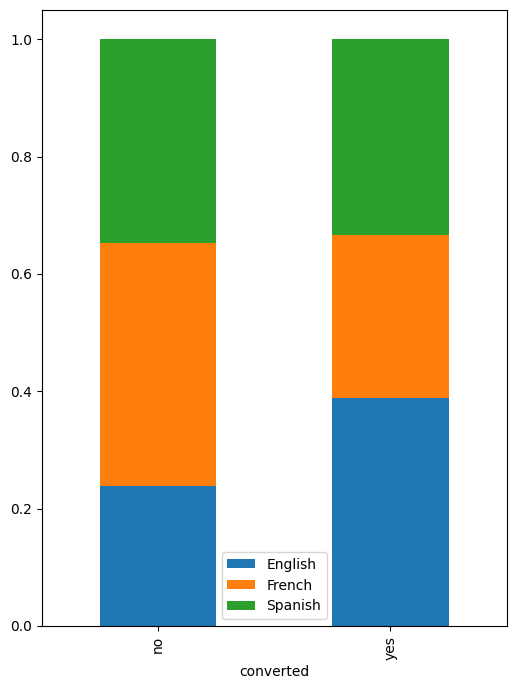

In [20]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

In [21]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [22]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [23]:
if p_value < 0.05:
    print('Since the p-value ' + str(p_value) + ' is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value ' +str(p_value) + ' is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


Since we fail to reject the null hypothesis, we can state that the converted status does not depend on the preferred language.

## 4. Is the time spent on the new page same for the different language users?

$H_0:$ The time spent on the new page is the same for the different language users.

$H_a:$ The time spent on the new page is differet for the different language users.

The appropriate test is a ANOVA Test.

Based on the problem, we select α=0.05 .

In [24]:
df_new = df[df['landing_page'] == 'new']
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

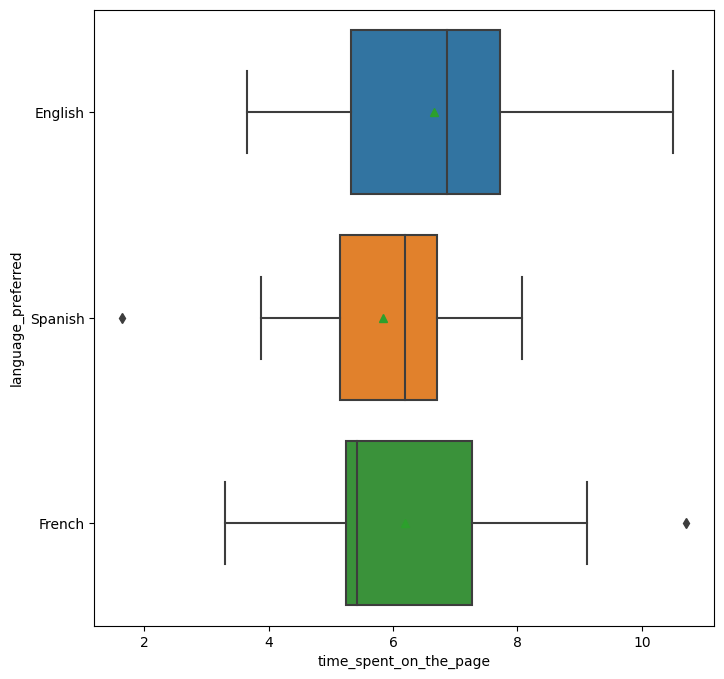

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()

In [26]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [27]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [28]:
if p_value < 0.05:
    print('Since the p-value ' + str(p_value) + ' is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value ' +str(p_value) + ' is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Since we fail to reject the null hypothesis, the time spent on the new page is the same for the different language users.

## Conclusion and Business Recommendations

Based off the statistical tests performed, we've learned that the company E-new Express new users do spend more time in the new landing page rather than the existing one and that the conversion rate of viewers to subscribers is higher for those viewing the new page. Factors that are not significant to gain more subscribers are access through one's preferred language. Preferred language also does not change the amount of time viewers spend on the landing page.

It seems that overall the new landing page does hold viewers for longer as well as convert a higher rate of viewers to subscribers.

___